In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## importing the dataset

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Minor_Utkarsh/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:

data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
## drop duplicate rows
data = data.drop_duplicates()

In [6]:
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
data['Time'] = sc.fit_transform(data['Time'].values.reshape(-1,1))
data['Amount'] = sc.fit_transform(data['Amount'].values.reshape(-1,1))

## analysis of dataset

In [7]:
## check if data is imbalance or not
data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

class_0_% is: 99.83328986416473
class_0_% is: 0.1667101358352777


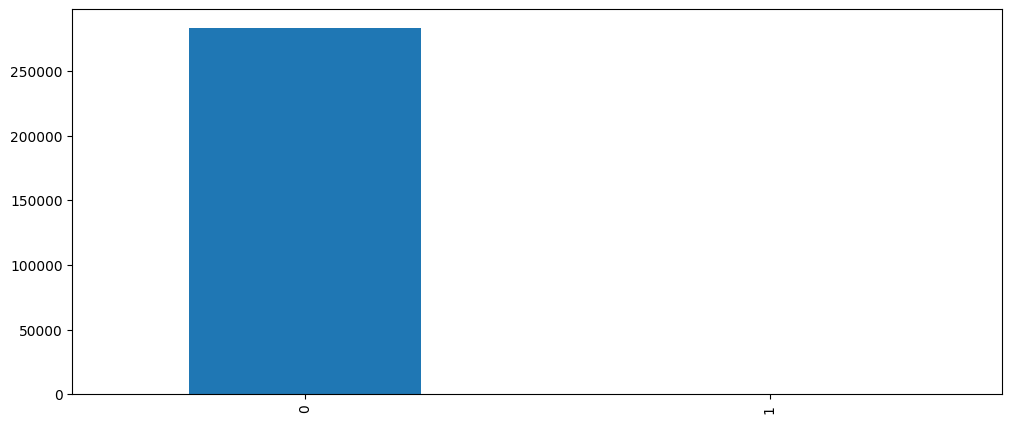

In [8]:
data['Class'].value_counts().plot(kind='bar', figsize=(12, 5))
print('class_0_% is: {}'.format(100*(data['Class'].value_counts()[0]/len(data))))
print('class_0_% is: {}'.format(100*(data['Class'].value_counts()[1]/len(data))))

In [9]:
from sklearn.model_selection import train_test_split
(train, test) = train_test_split(data, test_size=0.2, stratify = data['Class'])

In [10]:
train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
44580,-0.501667,1.281213,-0.546109,0.649486,0.168324,-0.963645,-0.064016,-0.632253,0.020673,-0.443037,...,-0.438605,-0.517035,0.036532,0.092037,0.370377,0.441625,0.029009,0.014640,-0.146016,0
161857,0.351291,1.916573,-0.777532,-2.202816,-1.517377,0.062995,-1.320949,0.481479,-0.434542,1.459251,...,0.156700,0.364917,-0.067364,0.657260,0.282003,-0.145735,-0.064636,-0.043132,1.501877,0
263385,0.895941,2.064208,0.307318,-2.663015,0.421641,1.121310,-1.142625,0.877995,-0.552551,-0.116905,...,0.050652,0.315790,-0.106553,0.499875,0.476205,0.687172,-0.101581,-0.044534,0.289390,0
216285,0.654876,1.999010,0.045111,-0.867072,0.564371,-0.422237,-1.739824,0.257500,-0.458546,0.471567,...,0.331419,1.161188,0.107442,0.928355,0.143653,-0.155819,-0.007478,-0.047590,-0.280490,0
277089,0.972609,-0.336083,1.151166,0.157096,-0.800058,1.219422,-0.505666,1.231659,-0.255015,-0.359992,...,-0.271782,-0.522759,-0.032414,0.680930,-0.647743,0.036788,0.064496,0.032675,-0.292171,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90849,-0.252588,-1.459629,0.255893,0.724477,0.094958,0.785389,-0.963788,0.276913,0.360045,-1.258892,...,0.220570,0.125210,-0.181772,0.072067,0.106180,0.311328,-0.071880,-0.110455,0.208594,0
144046,0.013344,-0.573615,1.119276,0.716351,-0.412599,0.780829,0.491939,0.485147,0.226697,-0.405985,...,-0.228682,-0.699017,-0.124479,-1.208989,-0.139351,0.131578,-0.017453,0.068134,-0.243638,0
69566,-0.366756,-0.794358,0.508119,1.662022,-1.392620,0.039018,-0.322383,0.410484,0.266177,-0.205720,...,0.011073,-0.007855,0.014635,0.035604,-0.449900,0.732462,0.257326,0.163192,0.010430,0
160129,0.334192,-0.464377,1.302694,-0.307801,-0.464422,0.629152,-0.208711,0.315642,-1.643474,0.309762,...,1.865431,0.660956,0.006777,0.490704,-0.361043,-0.405723,0.558024,0.305147,-0.292032,0


class_0_% is: 99.83346550356859
class_0_% is: 0.16653449643140364


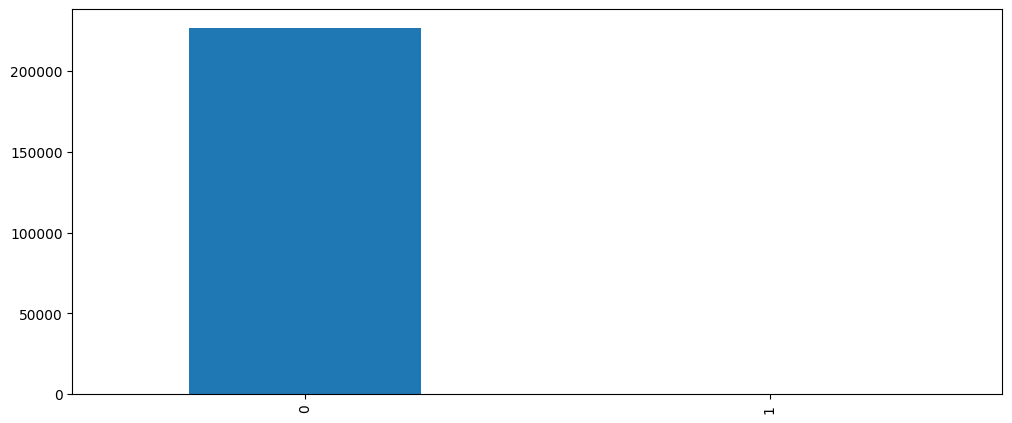

In [11]:
train['Class'].value_counts().plot(kind='bar', figsize=(12, 5))
print('class_0_% is: {}'.format(100*(train['Class'].value_counts()[0]/len(train))))
print('class_0_% is: {}'.format(100*(train['Class'].value_counts()[1]/len(train))))

In [12]:
test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
46955,-0.489904,-0.357052,0.334395,1.316508,-1.656222,-0.263029,-1.547669,0.666546,-0.297201,-1.638852,...,-0.054379,-0.384624,0.097708,0.671813,-0.370750,-0.761914,0.088838,0.141725,-0.041719,0
215150,0.649446,-0.934787,0.982657,1.087568,-0.684523,0.951135,-1.129358,1.107257,-0.182687,-0.546479,...,-0.049547,-0.173858,-0.422639,-0.013087,0.776580,0.293751,-0.028067,0.073903,-0.057016,0
120218,-0.105079,1.252596,0.021359,0.044063,0.325909,0.011174,-0.053598,-0.097035,0.013237,0.263268,...,-0.096153,-0.266459,-0.071237,-0.749998,0.389529,0.494047,-0.029793,0.002433,-0.058406,0
193197,0.532821,-0.650084,0.455936,-0.081964,-1.197056,1.399607,-1.574352,0.870378,-0.059454,-0.143379,...,0.407643,1.003737,-0.211689,-0.090634,-0.263016,-0.428450,0.148354,0.216989,-0.264219,0
245716,0.801256,-1.302797,1.155463,-1.991184,-3.000197,-0.790413,-1.926339,-0.198479,0.736532,-2.769831,...,0.137828,0.700706,-0.052697,-0.095147,-0.127098,-0.131002,0.256403,0.189972,-0.208594,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142648,0.001898,-1.004478,0.242935,1.375290,2.034392,-1.393425,1.124640,1.706172,-0.105825,-1.536360,...,-0.146367,-0.385928,0.613648,0.007975,-0.584374,0.896050,0.130980,-0.006588,5.107078,0
61337,-0.410262,-0.384047,0.752578,0.583394,-0.226477,0.606001,-0.101655,0.455328,0.143373,0.123916,...,-0.074513,-0.124522,-0.241050,-0.582542,-0.051397,0.215267,-0.110825,0.058813,-0.134752,0
221923,0.682281,1.984301,-0.896911,-0.869948,-0.385410,-0.640813,-0.158551,-0.623944,-0.033555,-0.337940,...,-0.241714,-0.202926,0.223164,0.739052,-0.184551,-0.400366,0.022510,-0.031630,0.568906,0
159396,0.325907,2.046776,-0.234826,-1.623038,0.240260,0.381211,-0.379451,0.133764,-0.140684,0.999961,...,-0.288367,-0.782050,0.198995,0.032119,0.011357,-0.532418,-0.027903,-0.048270,0.150883,0


class_0_% is: 99.83258731892997
class_0_% is: 0.16741268107003138


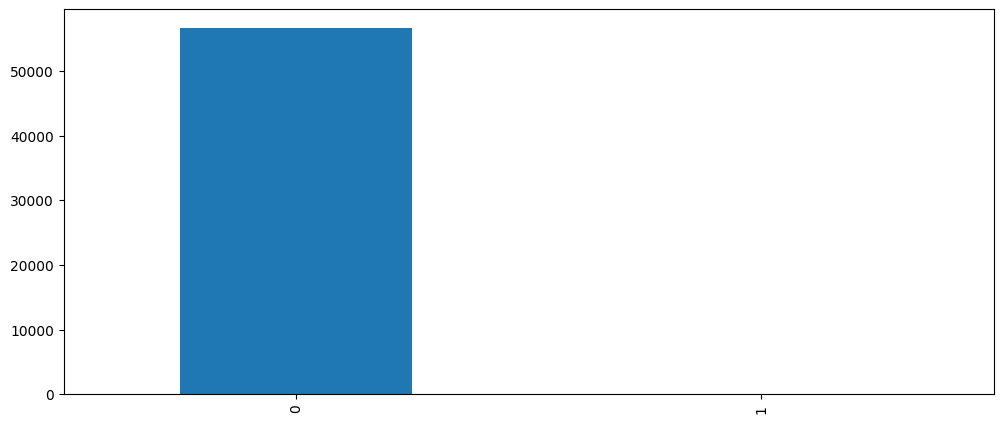

In [13]:
test['Class'].value_counts().plot(kind='bar', figsize=(12, 5))
print('class_0_% is: {}'.format(100*(test['Class'].value_counts()[0]/len(test))))
print('class_0_% is: {}'.format(100*(test['Class'].value_counts()[1]/len(test))))

## Apply SMOTE

In [14]:
train_X = train.iloc[:,:-1].values
train_y = train.iloc[:, -1].values

In [15]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(train_X, train_y)

In [16]:
X_resampled

array([[ -0.50166729,   1.28121346,  -0.54610938, ...,   0.02900929,
          0.01463957,  -0.14601585],
       [  0.35129108,   1.91657266,  -0.77753166, ...,  -0.06463561,
         -0.04313238,   1.50187735],
       [  0.89594063,   2.0642077 ,   0.30731788, ...,  -0.1015812 ,
         -0.04453424,   0.28938951],
       ...,
       [ -0.15184337,  -1.71575745,   0.81502709, ...,   0.48749351,
          0.21113052,  10.77424904],
       [ -0.34770756, -14.47830334,   8.12735828, ...,  -1.85042967,
         -1.00197365,   2.60907311],
       [ -0.57345773,  -2.14664595,   0.0552953 , ...,   0.20919837,
          0.24214978,   9.37735528]])

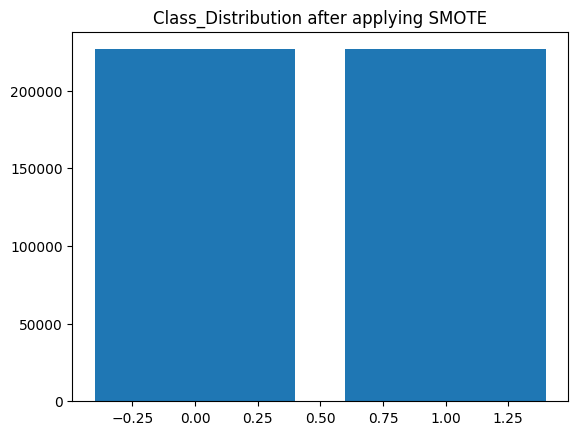

In [17]:
## Now, visualize the class_distribution of y_resampled after applying SMOTE
categories = [0,1]
values = [len(y_resampled[y_resampled == 0]), len(y_resampled[y_resampled == 1])]
plt.bar(categories, values)
plt.title('Class_Distribution after applying SMOTE')
plt.show()

## Training the model using LogisticRegression

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_resampled, y_resampled)

LogisticRegression()

In [19]:
y_pred = lr.predict(test.iloc[:,:-1].values)

### Making the confusion matrix for LogisticRegression

In [20]:
X_test = test.iloc[:,:-1].values
y_test = test.iloc[:,-1].values

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[55208  1443]
 [    9    86]]
0.9744122933775068


## Training the model using KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_resampled, y_resampled)

KNeighborsClassifier()

In [25]:
y_pred = knn.predict(X_test)

In [26]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[56563    88]
 [   16    79]]
0.9981672717019702


In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

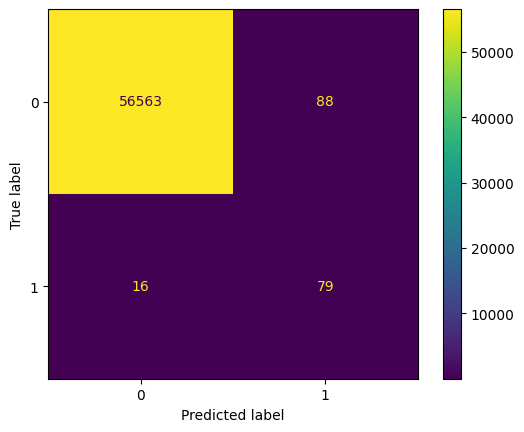

In [28]:
disp.plot()